In [1]:
import os

# Define the directory you want to traverse
directory_path = 'F:\Cancer Pred\Blood cell Cancer [ALL]'  # Replace this with the directory you want to traverse

# Function to walk through the directory and print file paths
def walk_directory(directory):
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirname, filename)
            print(filepath)

# Call the function with the specified directory
walk_directory(directory_path)


F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (1).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (10).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (11).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (12).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (13).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (14).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (15).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (16).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (17).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (18).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (19).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (2).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (20).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (21).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (23).jpg
F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\Sap_013 (24

In [2]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import os
import pandas as pd

# Define directory paths for different classes
Benign_dir = r'F:\Cancer Pred\Blood cell Cancer [ALL]\Benign'
Malignant_Pre_B_dirs = r'F:\Cancer Pred\Blood cell Cancer [ALL]\[Malignant] Pre-B'
Malignant_Pro_B_dirs = r'F:\Cancer Pred\Blood cell Cancer [ALL]\[Malignant] Pro-B'
Malignant_early_Pre_B_dirs = r'F:\Cancer Pred\Blood cell Cancer [ALL]\[Malignant] early Pre-B'

# Create lists of directory paths and corresponding labels
dir_lists = [Benign_dir, Malignant_Pre_B_dirs, Malignant_Pro_B_dirs, Malignant_early_Pre_B_dirs]
class_labels = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']

filepaths = []
labels = []

# Iterate through directories and collect file paths and labels
for i, dir_path in enumerate(dir_lists):
    if not os.path.exists(dir_path):
        print("Directory does not exist:", dir_path)
        continue
    
    flist = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    filepaths.extend([os.path.join(dir_path, file) for file in flist])
    labels.extend([class_labels[i]] * len(flist))

# Create DataFrame from collected data
bloodCell_data = {'filepaths': filepaths, 'labels': labels}
bloodCell_df = pd.DataFrame(bloodCell_data)

# Display first few rows of the DataFrame and value counts of labels
print(bloodCell_df.head())
print(bloodCell_df["labels"].value_counts())


                                           filepaths  labels
0  F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\...  Benign
1  F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\...  Benign
2  F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\...  Benign
3  F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\...  Benign
4  F:\Cancer Pred\Blood cell Cancer [ALL]\Benign\...  Benign
labels
Malignant_early Pre-B    979
Malignant_Pre-B          955
Malignant_Pro-B          796
Benign                   512
Name: count, dtype: int64


In [4]:
bloodCell_df.shape

(3242, 2)

In [5]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [6]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(2593, 2)
(973, 2)
(649, 2)
(2269, 2)


In [7]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", 
                                      batch_size=8,
                                      shuffle=False            
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=8,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=8,
                                    shuffle=False
                                   )

Found 2593 validated image filenames belonging to 4 classes.


Found 973 validated image filenames belonging to 4 classes.
Found 649 validated image filenames belonging to 4 classes.


In [8]:
classes=list(train.class_indices.keys())
print (classes)

['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']


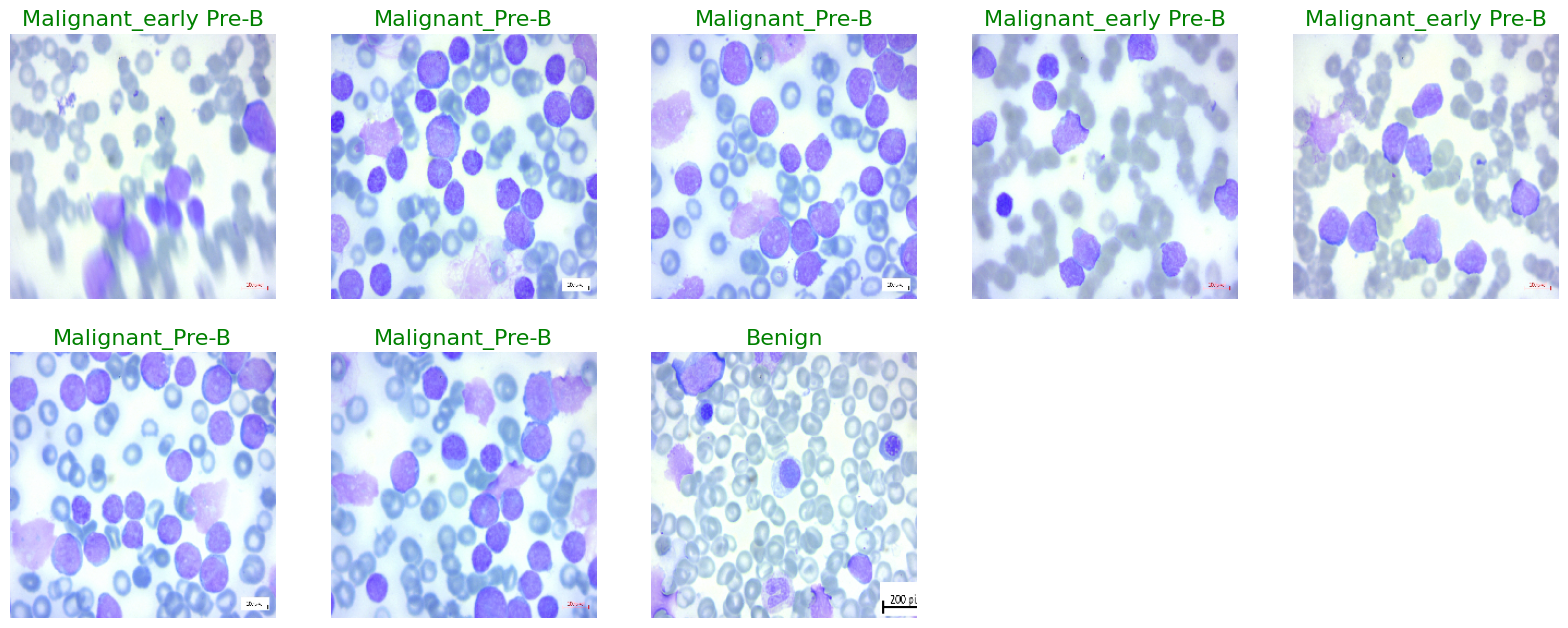

In [9]:
def show_Blood_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()
show_Blood_images(train)

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 128)       24704     
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 256)       819456    
                                                                 
 batch_normalization_1 (Bat  (None, 73, 73, 256)       1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                      

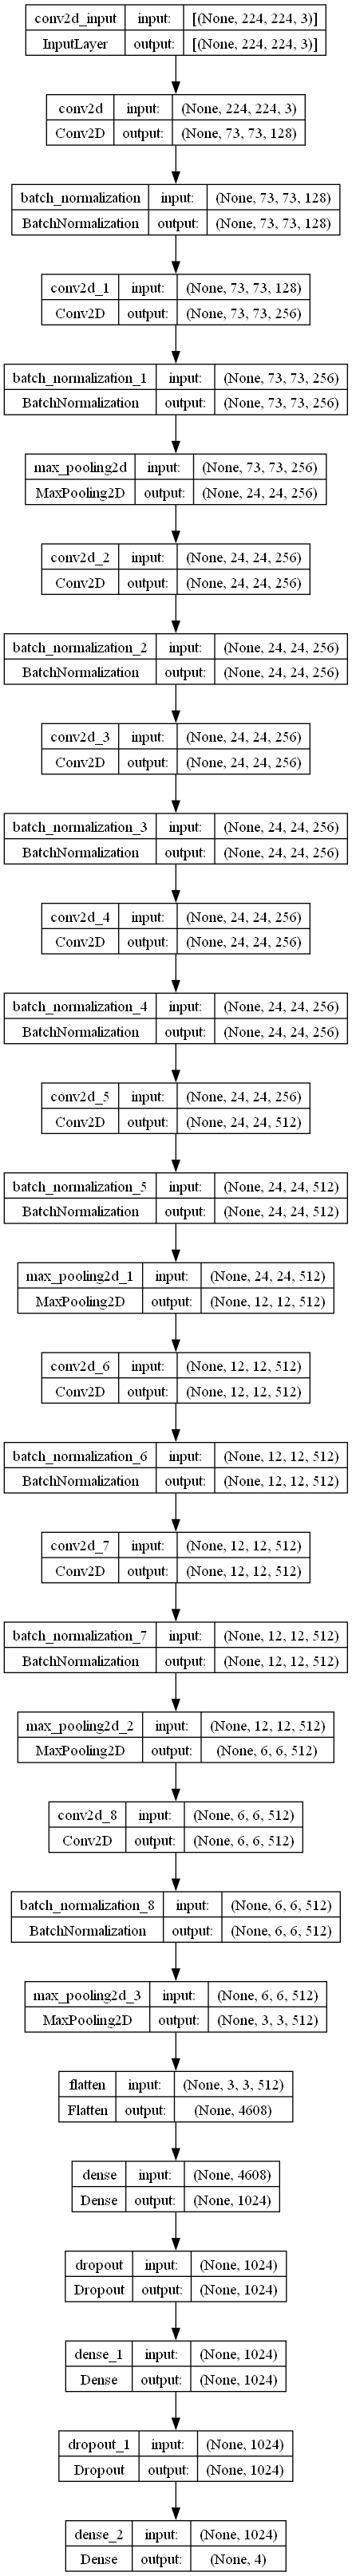

In [11]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
history = model.fit(train, epochs=10, validation_data=val, verbose=1)

Epoch 1/10


325/325 [==============================] - 420s 1s/step - loss: 1.1938 - accuracy: 0.6178 - val_loss: 1.0158 - val_accuracy: 0.5439
Epoch 2/10
325/325 [==============================] - 423s 1s/step - loss: 0.6357 - accuracy: 0.7725 - val_loss: 0.1974 - val_accuracy: 0.9337
Epoch 3/10
325/325 [==============================] - 416s 1s/step - loss: 0.3689 - accuracy: 0.8658 - val_loss: 0.1602 - val_accuracy: 0.9507
Epoch 4/10
325/325 [==============================] - 406s 1s/step - loss: 0.2542 - accuracy: 0.9105 - val_loss: 0.1168 - val_accuracy: 0.9692
Epoch 5/10
325/325 [==============================] - 413s 1s/step - loss: 0.1661 - accuracy: 0.9391 - val_loss: 0.1112 - val_accuracy: 0.9646
Epoch 6/10
325/325 [==============================] - 416s 1s/step - loss: 0.1290 - accuracy: 0.9526 - val_loss: 0.0916 - val_accuracy: 0.9646
Epoch 7/10
325/325 [==============================] - 421s 1s/step - loss: 0.0772 - accuracy: 0.9734 - val_loss: 0.1051 - val_accuracy: 0.96

In [13]:
history1 = model.fit(train, epochs=1, validation_data=val, verbose=1)

325/325 [==============================] - 413s 1s/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0924 - val_accuracy: 0.9630


In [14]:
model.evaluate(test, verbose=1)

122/122 [==============================] - 49s 403ms/step - loss: 0.0713 - accuracy: 0.9743


[0.0713280513882637, 0.9743062853813171]

In [15]:
model.save("Blood Cell.h5")

In [16]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

122/122 [==============================] - 47s 385ms/step


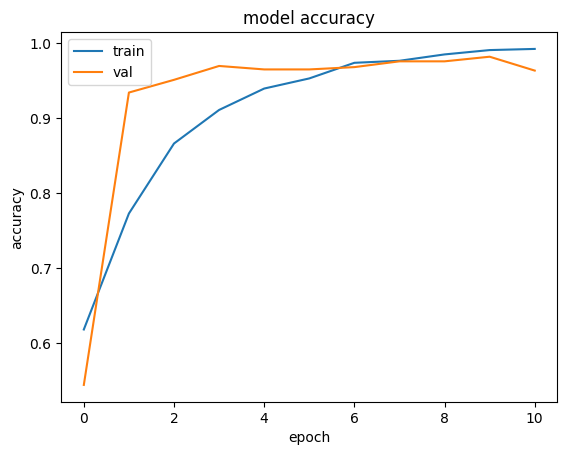

In [17]:
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

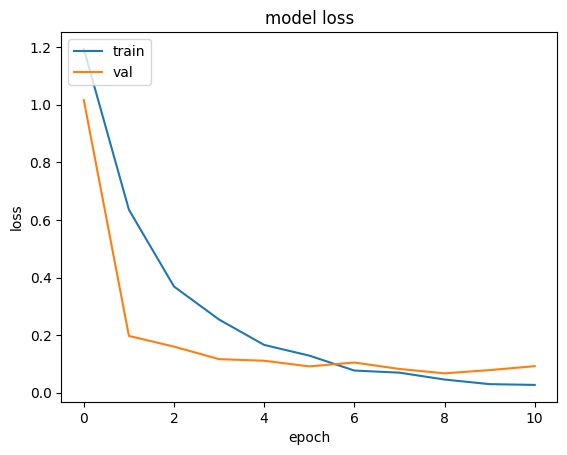

In [18]:
plt.plot(history.history['loss'] + history1.history['loss'])
plt.plot(history.history['val_loss'] + history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

                       precision    recall  f1-score   support

               Benign       0.97      0.90      0.93       173
      Malignant_Pre-B       0.99      1.00      0.99       286
      Malignant_Pro-B       0.96      1.00      0.98       223
Malignant_early Pre-B       0.97      0.98      0.97       291

             accuracy                           0.97       973
            macro avg       0.97      0.97      0.97       973
         weighted avg       0.97      0.97      0.97       973

Accuracy of the Model: 97.4%


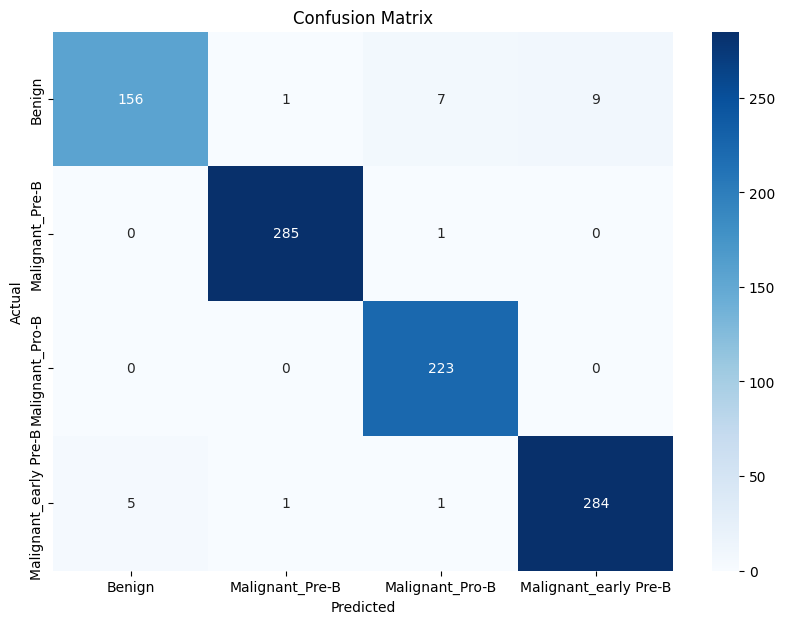

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']


cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [ ]:
model.save("2Blood Cell.h5")

In [56]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
directory_path = 'F:\Cancer Pred\Blood cell Cancer [ALL]'  # Directory containing the dataset
filepaths = []
labels = []

def walk_directory(directory):
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirname, filename)
            filepaths.append(filepath)
            labels.append(os.path.basename(dirname))

walk_directory(directory_path)

# Create DataFrame from collected data
bloodCell_data = {'filepaths': filepaths, 'labels': labels}
bloodCell_df = pd.DataFrame(bloodCell_data)

# Split the data into features (X) and labels (y)
X = []
y = np.array(bloodCell_df['labels'])

# Function to extract features from images
def extract_features(image_path, target_size=(100, 100)):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image to a fixed size
    image = cv2.resize(image, target_size)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Flatten the grayscale image into a 1D array
    features = gray_image.flatten()
    return features

# Extract features from each image
for image_path in bloodCell_df['filepaths']:
    features = extract_features(image_path)
    X.append(features)

# Convert the list of feature vectors to a NumPy array
X = np.array(X)

# Split the data into training and testing sets with 90% for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)

# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))

Support Vector Machine Classification Report:
                         precision    recall  f1-score   support

                 Benign       0.37      0.39      0.38        51
      [Malignant] Pre-B       0.74      0.67      0.70       101
      [Malignant] Pro-B       0.86      0.92      0.89        77
[Malignant] early Pre-B       0.65      0.65      0.65        96

               accuracy                           0.68       325
              macro avg       0.65      0.66      0.65       325
           weighted avg       0.68      0.68      0.68       325



In [57]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, rf_predictions))

Random Forest:
                         precision    recall  f1-score   support

                 Benign       0.93      0.25      0.40        51
      [Malignant] Pre-B       0.93      0.82      0.87       101
      [Malignant] Pro-B       0.85      0.99      0.92        77
[Malignant] early Pre-B       0.71      0.98      0.82        96

               accuracy                           0.82       325
              macro avg       0.86      0.76      0.75       325
           weighted avg       0.85      0.82      0.79       325



In [58]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, dt_predictions))

Decision Tree:
                         precision    recall  f1-score   support

                 Benign       0.40      0.41      0.40        51
      [Malignant] Pre-B       0.79      0.76      0.78       101
      [Malignant] Pro-B       0.86      0.91      0.89        77
[Malignant] early Pre-B       0.68      0.67      0.67        96

               accuracy                           0.71       325
              macro avg       0.68      0.69      0.69       325
           weighted avg       0.71      0.71      0.71       325



In [59]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("Naive Bayes:")
print(classification_report(y_test, nb_predictions))


Naive Bayes:
                         precision    recall  f1-score   support

                 Benign       0.36      0.53      0.43        51
      [Malignant] Pre-B       0.80      0.80      0.80       101
      [Malignant] Pro-B       0.95      0.94      0.94        77
[Malignant] early Pre-B       0.69      0.52      0.60        96

               accuracy                           0.71       325
              macro avg       0.70      0.70      0.69       325
           weighted avg       0.73      0.71      0.71       325



In [60]:
# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("Extreme Gradient Boosting (XGBoost):")
print(classification_report(y_test, xgb_predictions))

[18:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting (XGBoost):
                         precision    recall  f1-score   support

                 Benign       1.00      0.45      0.62        51
      [Malignant] Pre-B       0.93      0.83      0.88       101
      [Malignant] Pro-B       0.83      1.00      0.91        77
[Malignant] early Pre-B       0.77      0.96      0.86        96

               accuracy                           0.85       325
              macro avg       0.88      0.81      0.82       325
           weighted avg       0.87      0.85      0.84       325



In [61]:
# K-Nearest Neighbor (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("K-Nearest Neighbor (KNN):")
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbor (KNN):
                         precision    recall  f1-score   support

                 Benign       0.16      0.57      0.25        51
      [Malignant] Pre-B       1.00      0.01      0.02       101
      [Malignant] Pro-B       0.55      1.00      0.71        77
[Malignant] early Pre-B       0.33      0.02      0.04        96

               accuracy                           0.34       325
              macro avg       0.51      0.40      0.26       325
           weighted avg       0.57      0.34      0.23       325



In [62]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))

Logistic Regression:
                         precision    recall  f1-score   support

                 Benign       0.40      0.33      0.37        51
      [Malignant] Pre-B       0.49      0.47      0.48       101
      [Malignant] Pro-B       0.57      0.68      0.62        77
[Malignant] early Pre-B       0.61      0.61      0.61        96

               accuracy                           0.54       325
              macro avg       0.52      0.52      0.52       325
           weighted avg       0.53      0.54      0.53       325



In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [63]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("Support Vector Machine:")
print(classification_report(y_test, svm_predictions))

Support Vector Machine:
                         precision    recall  f1-score   support

                 Benign       0.37      0.39      0.38        51
      [Malignant] Pre-B       0.74      0.67      0.70       101
      [Malignant] Pro-B       0.86      0.92      0.89        77
[Malignant] early Pre-B       0.65      0.65      0.65        96

               accuracy                           0.68       325
              macro avg       0.65      0.66      0.65       325
           weighted avg       0.68      0.68      0.68       325

